## Analysis of finer hyperparameter tuning (phase 2)
## Also includes auc, recall and precision in addition to f1 score

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# Define a function to parse each line of the text file
def parse_line(line):
    # Use ast.literal_eval to convert the string representation of the list into a Python list
    parsed_line = ast.literal_eval(line)
    # Extract the dictionary and tuple from the parsed line and return them as separate values
    return parsed_line[0], parsed_line[1]

# Load the text file into a list of lines
with open(r'C:\Users\mandy\Documents\MIDS\W207\W207MammogramProject\results_cnn_random_search_2_dropout_poolsize_only.txt') as f:
    lines = f.readlines()

# Parse each line using the parse_line function
parsed_lines = [parse_line(line) for line in lines]

# Convert the list of parsed lines into a pandas DataFrame
df = pd.DataFrame(parsed_lines)

#print(df[0].apply(pd.Series))
#print(df.drop([0], axis=1))
# Convert the first column of the DataFrame, which contains the dictionary, into separate columns
df = pd.concat([df.drop([0], axis=1), df[0].apply(pd.Series)], axis=1)

# Rename the columns to remove the "None" values from the nested dictionaries
#df = df.rename(columns=lambda x: x.replace('None', ''))

# Combine the results column with the DataFrame
df = pd.concat([df, df.pop(1).apply(pd.Series)], axis=1)

df = df.rename(columns={0: 'accuracy'})
df = df.rename(columns={1: 'f1_score'})
df = df.rename(columns={2: 'auc'})
df = df.rename(columns={3: 'recall'})
df = df.rename(columns={4: 'precision'})

# create a LabelEncoder object
le = LabelEncoder()

# Get the position of the old column


# Insert the new column next to the old column
opt_idx = df.columns.get_loc('optimizer')
df.insert(opt_idx + 1, 'optimizer_encoded', le.fit_transform(df['optimizer']))

# Print the resulting DataFrame
print(df)


    num_units  dropout_rate optimizer  optimizer_encoded  n_epochs  \
0          32           0.9      adam                  0        10   
1          32           0.9      adam                  0        10   
2          32           0.9      adam                  0        10   
3          32           0.3      adam                  0        10   
4          32           0.9      adam                  0        10   
5          32           0.9      adam                  0        10   
6          32           0.9      adam                  0        10   
7          32           0.9      adam                  0        10   
8          32           0.3      adam                  0        10   
9          32           0.9      adam                  0        10   
10         32           0.3      adam                  0        10   
11         32           0.3      adam                  0        10   
12         32           0.3      adam                  0        10   
13         32       

<Axes: >

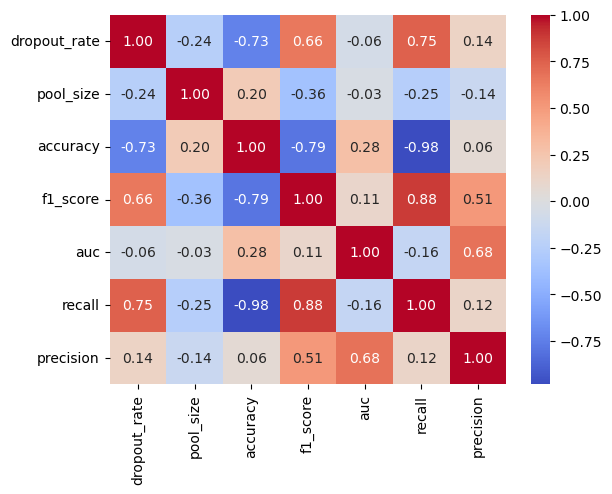

In [4]:
#Reduce df to only parameters that were varied
df = df.drop(['num_units', 'optimizer', 'optimizer_encoded','n_epochs','batch_size','class_weight_binary','n_augm'], axis=1)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with Seaborn
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fmt': '.2f'})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

In [5]:
print(df.shape)
# There were 20 experiments run on this model for the purpose of hyperparameter tuning

(20, 7)


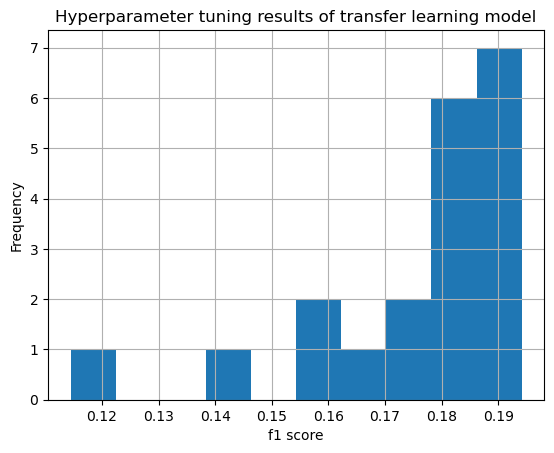

In [6]:
# Plot a histogram of the 'col1' column
df['f1_score'].hist()

# Set the title and labels for the plot
plt.title('Hyperparameter tuning results of transfer learning model')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

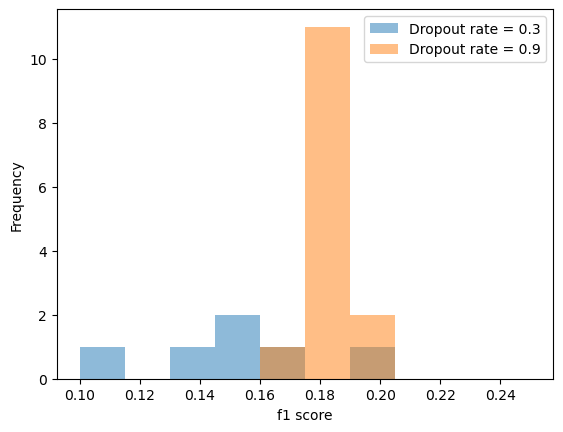

In [7]:
# Create two subsets of the DataFrame based on the value of use of class weights or not
subset_0 = df[df['dropout_rate'] == 0.3]
subset_1 = df[df['dropout_rate'] == 0.9]

# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['f1_score'], alpha=0.5, label='Dropout rate = 0.3', bins =10, range = [0.1,.25])
plt.hist(subset_1['f1_score'], alpha=0.5, label='Dropout rate = 0.9', bins = 10, range = [0.1,.25])

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('f1 score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

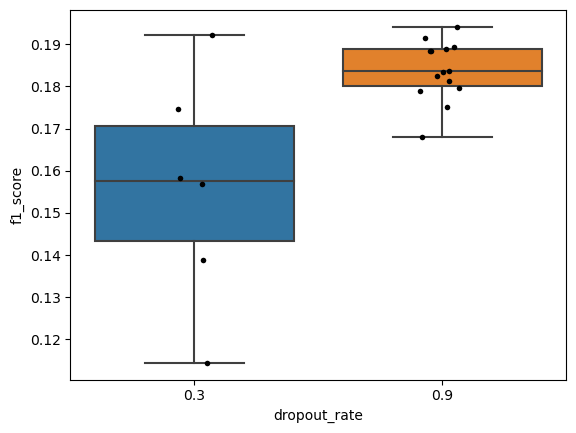

In [8]:
# Create a scatter plot of the x and y columns
#df.plot.scatter(x='dropout_rate', y='f1_score')
sns.boxplot(x=df['dropout_rate'], y=df['f1_score'])
sns.stripplot(x=df['dropout_rate'], y=df['f1_score'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

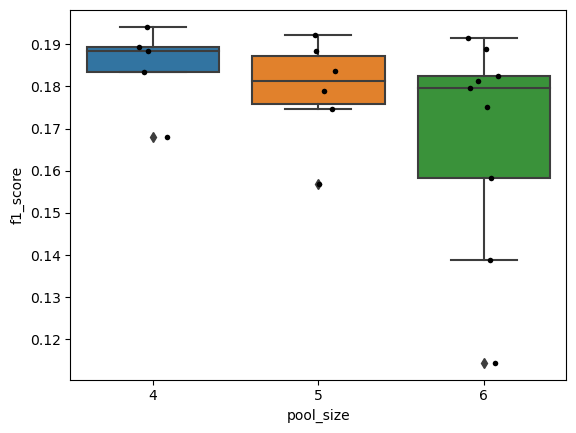

In [9]:
# Create a scatter plot of the x and y columns
#df.plot.scatter(x='dropout_rate', y='f1_score')
sns.boxplot(x=df['pool_size'], y=df['f1_score'])
sns.stripplot(x=df['pool_size'], y=df['f1_score'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

## Conclusions
#### Analysis for f1 scores
#### Pool size 4 is better than 5 or 6
#### Dropout rate to 0.9 seems more consistently high

## Analysis for auc, precision, recall, and f1 score

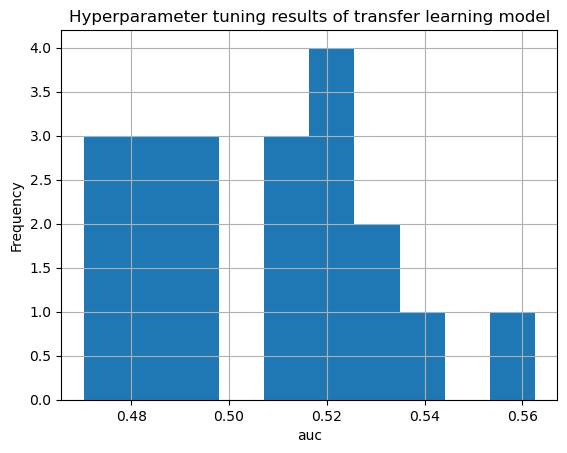

In [10]:
# Plot a histogram of the 'col1' column
df['auc'].hist()

# Set the title and labels for the plot
plt.title('Hyperparameter tuning results of transfer learning model')
plt.xlabel('auc')
plt.ylabel('Frequency')

# Show the plot
plt.show()

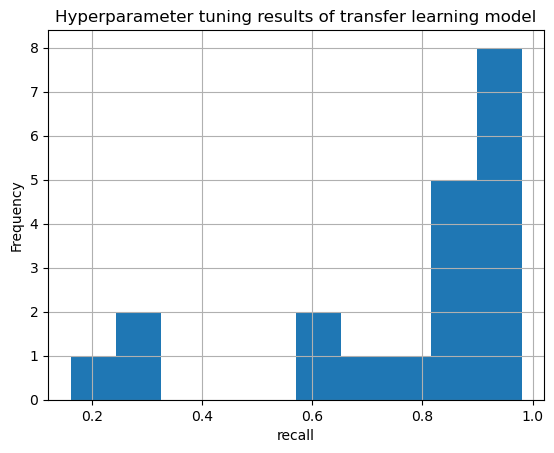

In [11]:
# Plot a histogram of the 'col1' column
df['recall'].hist()

# Set the title and labels for the plot
plt.title('Hyperparameter tuning results of transfer learning model')
plt.xlabel('recall')
plt.ylabel('Frequency')

# Show the plot
plt.show()

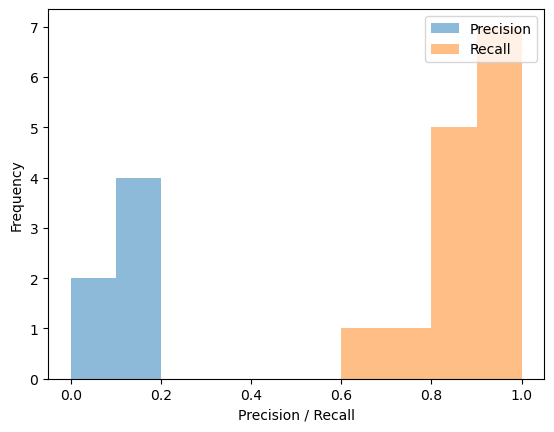

In [12]:
# Plot the two histograms together with a semi-transparent fill to show overlap
plt.hist(subset_0['precision'], alpha=0.5, label='Precision', bins =10, range = [0,1])
plt.hist(subset_1['recall'], alpha=0.5, label='Recall', bins = 10, range = [0,1])

# Add a legend and labels
plt.legend(loc='upper right')
plt.xlabel('Precision / Recall')
plt.ylabel('Frequency')

# Show the plot
plt.show()

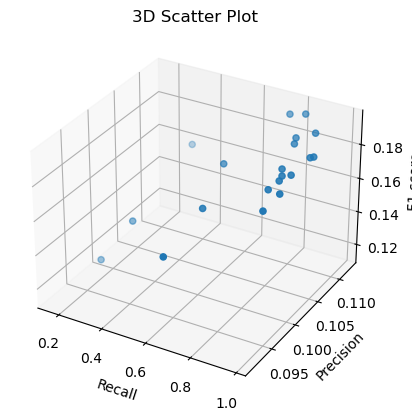

In [13]:
# Assuming your dataframe is called 'df'
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df['recall'], df['precision'], df['f1_score'])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_zlabel('F1 score')
ax.set_title('3D Scatter Plot')
plt.show()

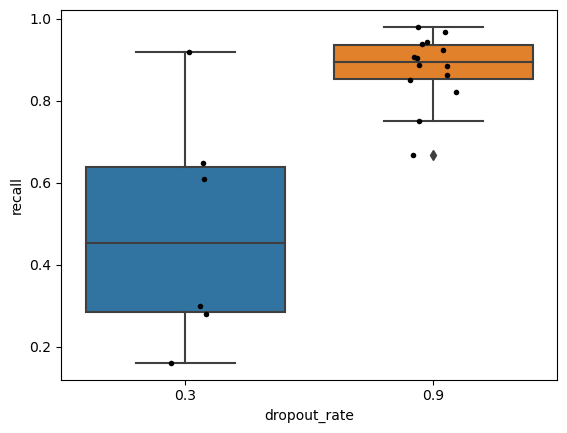

In [14]:
# Create a scatter plot of the x and y columns
#df.plot.scatter(x='dropout_rate', y='f1_score')
sns.boxplot(x=df['dropout_rate'], y=df['recall'])
sns.stripplot(x=df['dropout_rate'], y=df['recall'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

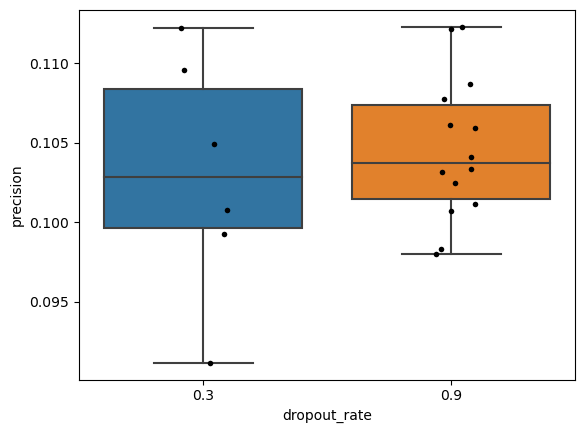

In [15]:
# Create a scatter plot of the x and y columns
#df.plot.scatter(x='dropout_rate', y='f1_score')
sns.boxplot(x=df['dropout_rate'], y=df['precision'])
sns.stripplot(x=df['dropout_rate'], y=df['precision'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

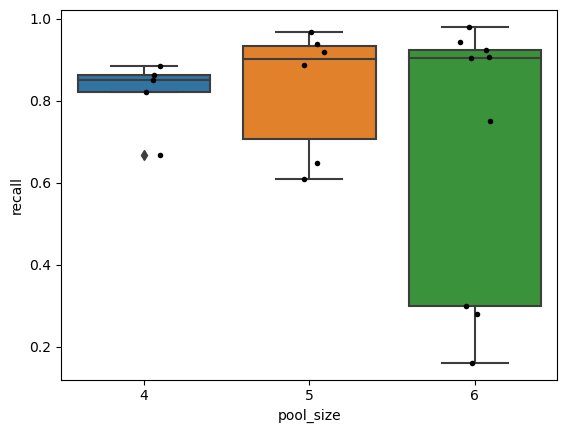

In [16]:
# Create a scatter plot of the x and y columns
#df.plot.scatter(x='dropout_rate', y='f1_score')
sns.boxplot(x=df['pool_size'], y=df['recall'])
sns.stripplot(x=df['pool_size'], y=df['recall'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

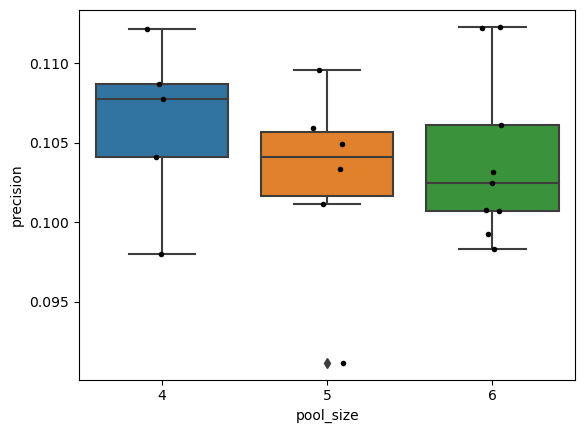

In [17]:
# Create a scatter plot of the x and y columns
#df.plot.scatter(x='dropout_rate', y='f1_score')
sns.boxplot(x=df['pool_size'], y=df['precision'])
sns.stripplot(x=df['pool_size'], y=df['precision'],  color='black', size=4, jitter=True)

# Show the plot
plt.show()

## Conclusions 2
#### Note dropout rate seems to affect recall but not precision
#### Confirm pool size affects recall and precision in opposite ways. 
#### No new actions from this analysis, just interesting to split out analysis with recall and precision

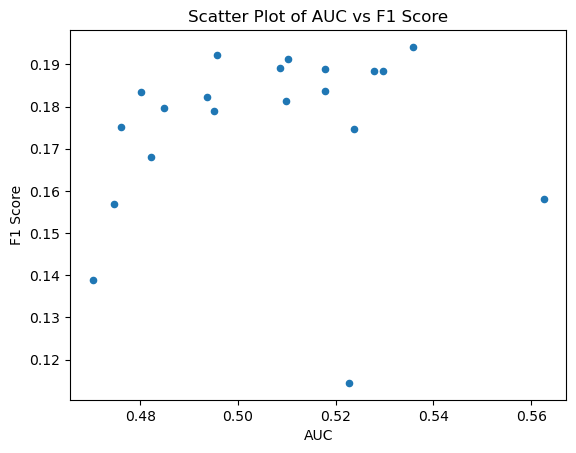

In [18]:
df.plot.scatter(x='auc', y='f1_score')
plt.xlabel('AUC')
plt.ylabel('F1 Score')
plt.title('Scatter Plot of AUC vs F1 Score')
plt.show()

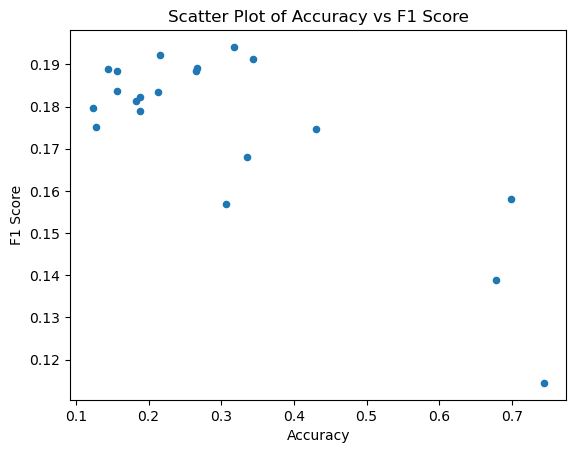

In [21]:
df.plot.scatter(x='accuracy', y='f1_score')
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Scatter Plot of Accuracy vs F1 Score')
plt.show()